In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [74]:
hr = pd.read_csv("/content/sample_data/HR_comma_sep (1).csv")
dum_hr = pd.get_dummies(hr)
dum_hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [75]:
dum_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.10,0.77,6,247,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
3,0.92,0.85,5,259,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.89,1.00,5,224,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False
14991,0.37,0.48,2,160,3,0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False
14992,0.37,0.53,2,143,3,0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False
14993,0.11,0.96,6,280,4,0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False


In [76]:
dum_hr.shape

(14995, 21)

In [90]:
train, test = train_test_split(dum_hr, test_size=0.3 , random_state=25, stratify=dum_hr['left'])
train.shape, test.shape

((10496, 21), (4499, 21))

In [103]:
dum_hr['left'].value_counts(normalize=True)*100

,proportion
left,
0,76.212071
1,23.787929


In [120]:
train['left'].value_counts(normalize=True)*100

,proportion
left,
0,76.209985
1,23.790015


In [121]:
train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [108]:
X_train = train.drop('left', axis=1)
y_train = train['left']
X_test = test.drop('left', axis=1)
y_test = test['left']

In [109]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Inferencing on testing set

In [110]:
y_pred = lr.predict(X_test)

In [111]:
np.unique( y_pred , return_counts=True)

(array([0, 1]), array([3882,  617]))

In [112]:
confusion_matrix( y_test, y_pred )

array([[3205,  224],
       [ 677,  393]])

In [113]:
accuracy_score( y_test, y_pred )

0.7997332740609024

In [114]:
from sklearn.metrics import classification_report , recall_score, precision_score , f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [115]:
print (recall_score(y_test, y_pred, pos_label=0))
print (recall_score(y_test, y_pred, pos_label=1))

0.9346748323126276
0.36728971962616824


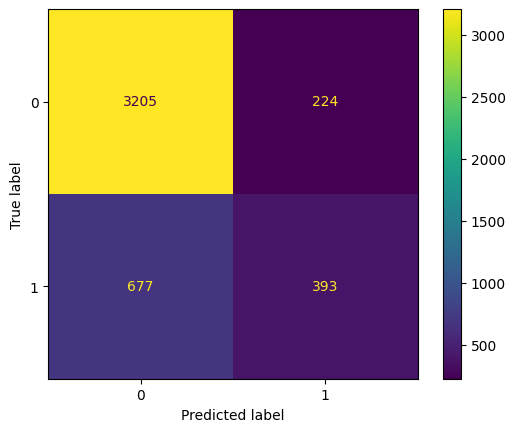

In [117]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3429
           1       0.64      0.37      0.47      1070

    accuracy                           0.80      4499
   macro avg       0.73      0.65      0.67      4499
weighted avg       0.78      0.80      0.78      4499

